# Evidence
### Financial Modeling and Programming

##### Name: Diego Arturo Salazar Silva
##### Teacher: Homero Zambrano

At first, I import some libraries, I will need pandas, and sklearn for the models

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

I'll copy the data frame, I will use the first one for the Linear Discriminant Analysis and the second one to the Linear Regression

In [194]:
df = pd.read_csv('/Users/diegosalazar/Documents/evidence.csv')
dg = df.copy()

### Data cleaning

In this section, I will treat any missing values (NAs), I will standarize the values needed or encoding them (if needed). Also, I need to know how many categories are in the independent variable. (4 categories)

In [195]:
#df.value_counts("PosGroup")

Here, I normalize my variables because in order to apply any Machine Learning method, the values should be in the same magnitude.

In [202]:
scaler = StandardScaler()
df["Height"] = df["Height"].astype(float)
df["Weight"] = df["Weight"].astype(float)
df.loc[:, "Height"] = scaler.fit_transform(df[["Height"]])
df.loc[:, "Weight"] = scaler.fit_transform(df[["Weight"]])

Here, I divide my code into my dependent variables and my independent variable

In [203]:
y = df['PosGroup']
x = df[['Height', 'Weight']]

### Linear Discriminant Analysis

At first, I need to divide the data set into 2 parts, the one that trains the model, and the one that tests it.
I used a distribution of 80% to train and 20% to test. At every time you run the code, it will show different results because there is no seed (random_state) given.

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [199]:
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)



LinearDiscriminantAnalysis()

In [200]:
y_pred = model.predict(x_test)


### Confusion Matrix and Classification Report
1. Show the confusion matrix and classification report, using PosGroup as class. Do note that you may need to clean the dataset, and perhaps, to encode and/ or normalize some variables.

In [218]:
conf_matrix = confusion_matrix(y_test, y_pred)
clas_report = classification_report(y_test, y_pred)

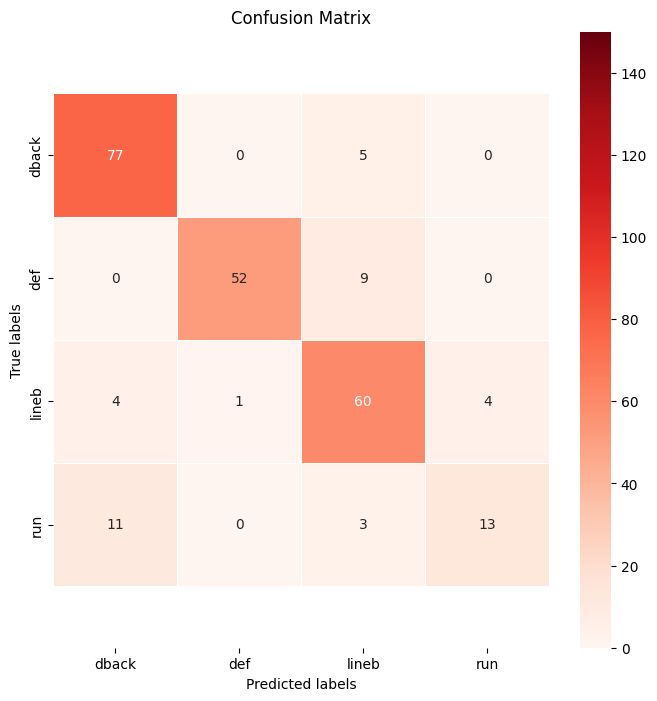

In [219]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(conf_matrix, annot = True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['dback', 'def', 'lineb','run'])
ax.yaxis.set_ticklabels(['dback', 'def', 'lineb','run']);

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

plt.show()

As seen, the matrix goes pretty well, the main diagonal shows the biggest numbers, that means that the model goes well.

In [204]:
print(f'Classification Report:\n {clas_report}')

Classification Report:
               precision    recall  f1-score   support

       dback       0.84      0.94      0.89        82
         def       0.98      0.85      0.91        61
       lineb       0.78      0.87      0.82        69
         run       0.76      0.48      0.59        27

    accuracy                           0.85       239
   macro avg       0.84      0.79      0.80       239
weighted avg       0.85      0.85      0.84       239



The scores may change in the future, but the f1-score of every variable is pretty high, being 0.89 for dbacks, 0.91 for def, 0.82 for lineb and 0.59 for run. Also the model has an accuracy of 0.85, which is pretty high for this kind of situations.

### Cross Validation Report
2. Calculate the cross validation score (CVS). Show it.

In [205]:
scores = cross_val_score(model, x, y, cv=5)

print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [0.84937238 0.77405858 0.77731092 0.82352941 0.84453782]
Average Cross-Validation Score: 0.8137618227207201


Overall, the results indicate that the model is performing well, with reasonable consistency across different validation folds. An average score of 0.814 indicates that the model has good predictive power and can generalize well to unseen data, which is a desirable characteristic in a predictive model.

### Removing any independent variable
3. Remove any independent variable(s) so that the model results in a larger CVS. Show the resulting variable(s) and the final CVS.

In [169]:
selector = RFECV(model, cv=3)
selector = selector.fit(x_train, y_train)
print("Optimal number of variables: %d" % selector.n_features_)
print("Selected variables: %s" % selector.support_)

Optimal number of variables: 2
Selected variables: [ True  True]


Apparently, both independent variables are needed in the model, since the Recursive Feature Elimination, after the iterations, did not find any variables that is not important. The final Cross Validation Score would be the same as the last one.

### Prediction
4. Show the predicted PosGroup for a guy with jersey number 64, 71" tall, 199 lb weight, born on June 17th, 1990; four years of experience, who comes from Alabama college, plays for the 49ers, and whose state is Florida. Do note that you may not need some of these data, depending on your model. If you deem that you need more info, you may make assumptions, as long as these are explicit in a text cell.

In this section, I will test the code with a sample of one player, the data is given in the text above.

In [170]:
player_data = pd.DataFrame({
    'JerseyNumber': [64],
    'Height': [71],  # in inches
    'Weight': [199],  # in pounds
    'BirthDate': ['1990-06-17'],
    'Experience': [4],  # in years
    'College': ['Alabama'],
    'Team': ['49ers'],
    'State': ['Florida']
})

player_data = player_data[['Height', 'Weight']]



In [171]:
pred = model.predict(player_data)

print("After the model, the predicted position of the player is:", pred[0])

After the model, the predicted position of the player is: def


*def stands for defensive

### Linear Regression Model

To run this linear regression model, I will need to encode the dependant variable: PosGroup, this because we need a quantitative variable. Also, in this section I will use the data frame 'dg'.

In [207]:
le = LabelEncoder()

dg['PosGroup'] = le.fit_transform(dg['PosGroup'])


In [208]:
labels = le.classes_

for i, label in enumerate(labels):
    print(f"{label}: {i}")

dback: 0
def: 1
lineb: 2
run: 3


In [209]:
y = dg['PosGroup']
x = dg[['Height', 'Weight']]

In [210]:
model = LinearRegression().fit(x, y)
r_squared = model.score(x, y)
b = model.intercept_
m = model.coef_


In [211]:
print(f"The results of the linear regression is an r^2 score of {r_squared:.2f}, the intercept is {b:.2f}, and the coefficients are {m[0]:.2f} and {m[1]:.2f}, for Height and Weight respectively." )

The results of the linear regression is an r^2 score of 0.06, the intercept is 6.18, and the coefficients are -0.10 and 0.01, for Height and Weight respectively.


If you want to make a prediction with this linear regression model, it would be like this.

In [212]:
player_data = pd.DataFrame({
    'JerseyNumber': [64],
    'Height': [71],  # in inches
    'Weight': [199],  # in pounds
    'BirthDate': ['1990-06-17'],
    'Experience': [4],  # in years
    'College': ['Alabama'],
    'Team': ['49ers'],
    'State': ['Florida']
})
player_data = player_data[['Height', 'Weight']]

pred = model.predict(player_data)
pred[0]

1.0667561291391063

Or seen, in a more simple form: (uncomment to run it)

In [213]:
"""
b0 = 6.18
b1 = -0.10
b2 = 0.01
height = 71
weight = 199

pos_group = b0 + (b1 * height) + (b2 * weight)
pos_group
"""

1.0699999999999992

As seen, the result is PosGroup = 1, that is very close to a defensive player, this goes similar to the result given by the Linear Discriminant Analysis seen recently. It predicted it was a defensive player also.

### Conclusion
In conclusion, both models concluded that a player with those characteristics, is that the player should be a defensive player.